In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Features Explaination

work_year : The year the salary was paid.
experience_level : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
employment_type : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title : The role worked in during the year.
salary : The total gross salary amount paid.
salary_currency : The currency of the salary paid as an ISO 4217 currency code.
salary_in_usd : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
company_location : The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [30]:
df = pd.read_csv("ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<Axes: ylabel='work_year'>

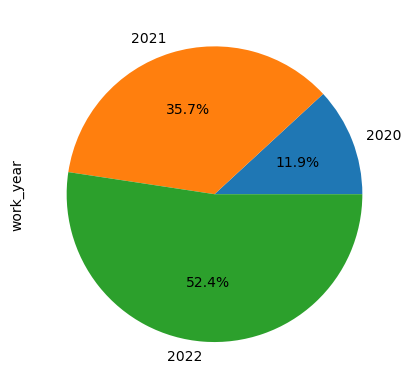

In [31]:
df.groupby("work_year")["work_year"].count().plot.pie(autopct="%1.1f%%")

In [32]:
df["work_year"].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

Observation:

Column Unnamed: 0 needs to be removed, as it is unecessary columns.
The names of each column are lowercase.
The values of the experience_level, employment_type, remote_ratio, and company_size columns need to be redefined.
work_year, salary, salary_in_usd, and remote_ratio columns are numeric.
More than 50% of data are in 2022.

Data Cleaning

In [33]:
#Drop unecessary columns
df = df.drop(columns=["Unnamed: 0"])

In [34]:
#checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [35]:
#Checking and handling missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Handling Duplicate data

In [36]:
# Checking duplicated data
df.duplicated().sum()

42

In [37]:
There are 42 duplicate rows; will be dropped later.

SyntaxError: invalid syntax (1950768655.py, line 1)

In [ ]:
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M


In [ ]:
# Drop duplicated rows
df = df.drop_duplicates()

In [ ]:

# Sanity check
df.duplicated().sum()

0

In [ ]:
# Reset Index
df = df.reset_index(drop=True)

Renaming the column value

In [ ]:
# Renaming the column value

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [ ]:
# Recheck data info
df.info()

Checking the number of unique values

In [ ]:
# Checking the number of unique values in each column

dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


In [ ]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


Additional Check

In [ ]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [ ]:
# check for odd values in categorical columns, such as string "-", or other
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

experience_level
experience_level
Senior-level    243
Mid-level       208
Entry-level      88
Expert-level     26
Name: count, dtype: int64 

salary_currency
salary_currency
USD    359
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: count, dtype: int64 

company_location
company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64 

employee_residence
employee_residence
US    295
G

Observations:

Successfully drop unnecessary column : Unnamed: 0.
Dataframe has no missing values.
There are 42 duplicate rows, but have gone.
Renaming the values in columns experience_level, employment_type, remote_ratio, company_size to make it easier to understand the data.
After renaming the column value, the dtype of the remote_ratio column changes to object.

Exploratory Data Analysis
Statistical Summary of Columns

In [ ]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [ ]:
df[numerical]

,work_year,salary,salary_in_usd
0,2020,70000,79833
1,2020,260000,260000
2,2020,85000,109024
3,2020,20000,20000
4,2020,150000,150000
...,...,...,...
560,2022,154000,154000
561,2022,126000,126000
562,2022,129000,129000
563,2022,150000,150000


In [ ]:
df[numerical].describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [ ]:
df[categorical]

,experience_level,salary_currency,company_location,employee_residence,remote_ratio,company_size,job_title,employment_type
0,Mid-level,EUR,DE,DE,Onsite,Large,Data Scientist,Full-time
1,Senior-level,USD,JP,JP,Onsite,Small,Machine Learning Scientist,Full-time
2,Senior-level,GBP,GB,GB,Hybrid,Medium,Big Data Engineer,Full-time
3,Mid-level,USD,HN,HN,Onsite,Small,Product Data Analyst,Full-time
4,Senior-level,USD,US,US,Hybrid,Large,Machine Learning Engineer,Full-time
...,...,...,...,...,...,...,...,...
560,Senior-level,USD,US,US,Remote,Medium,Data Engineer,Full-time
561,Senior-level,USD,US,US,Remote,Medium,Data Engineer,Full-time
562,Senior-level,USD,US,US,Onsite,Medium,Data Analyst,Full-time
563,Senior-level,USD,US,US,Remote,Medium,Data Analyst,Full-time


In [38]:

df[categorical].describe()

,remote_ratio
count,607.00000
mean,70.92257
std,40.70913
min,0.00000
25%,50.00000
50%,100.00000
75%,100.00000
max,100.00000


Univariate Analysis

/var/folders/n_/ykzc4f9d07d1vpwy6td0g3fc0000gn/T/ipykernel_95256/711611551.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/n_/ykzc4f9d07d1vpwy6td0g3fc0000gn/T/ipykernel_95256/711611551.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


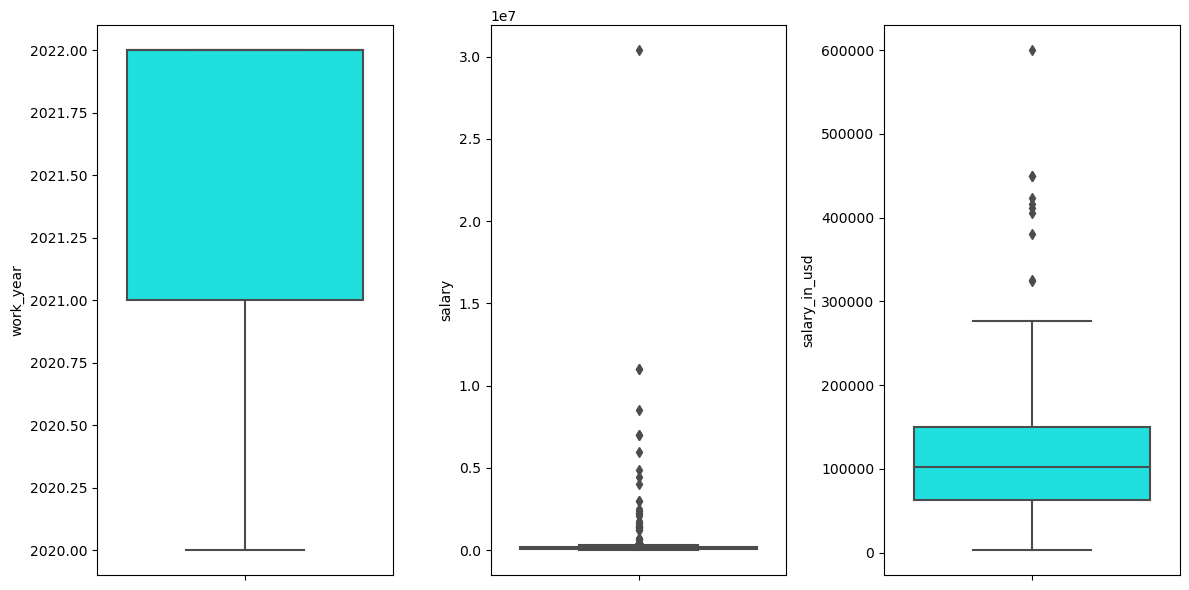

In [39]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Observation:

There is no outlier in work_year column.
There are some outliers in the salary and salary_in_usd columns.

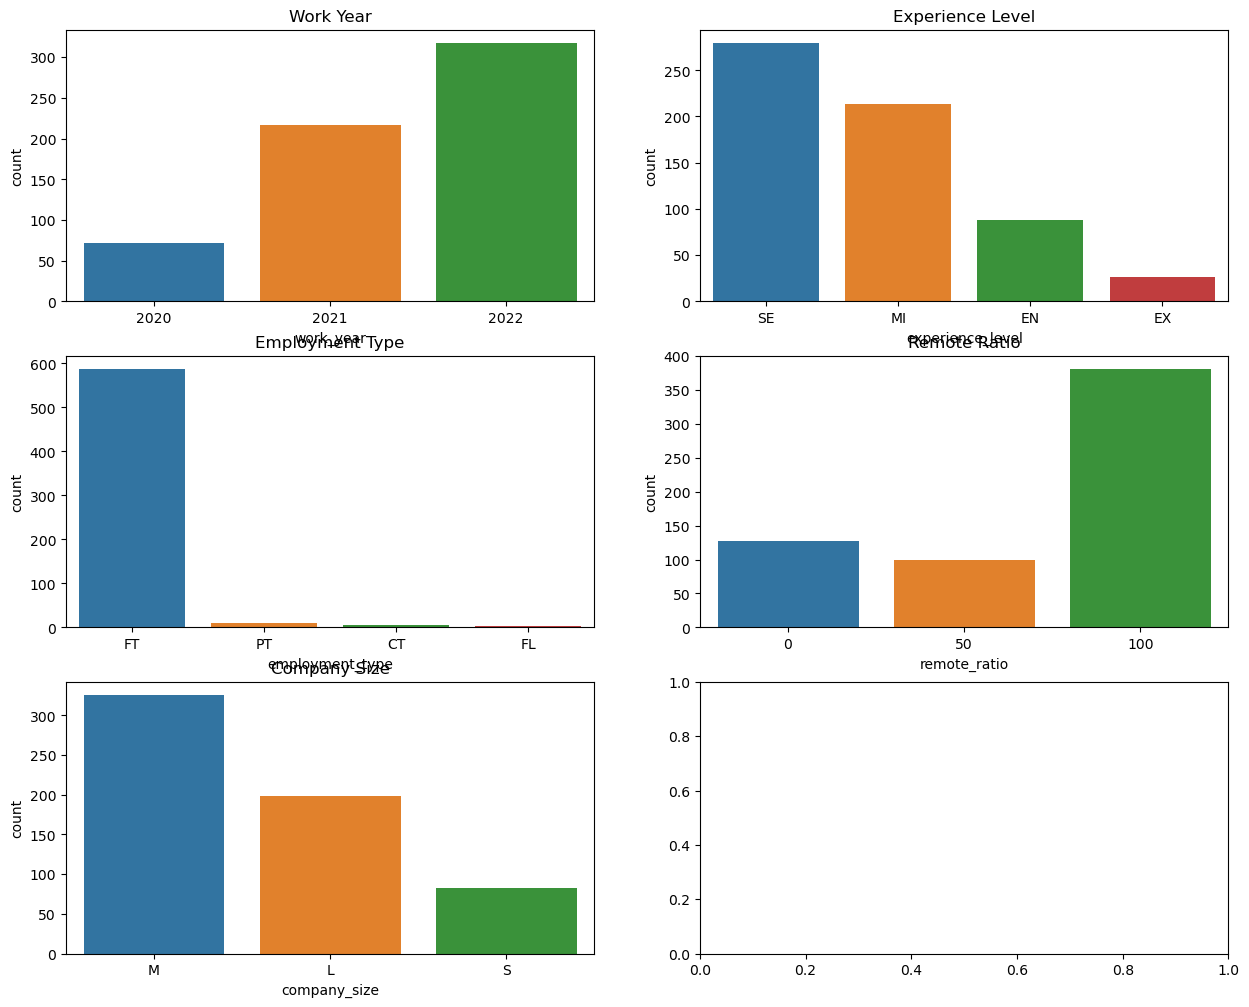

In [40]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

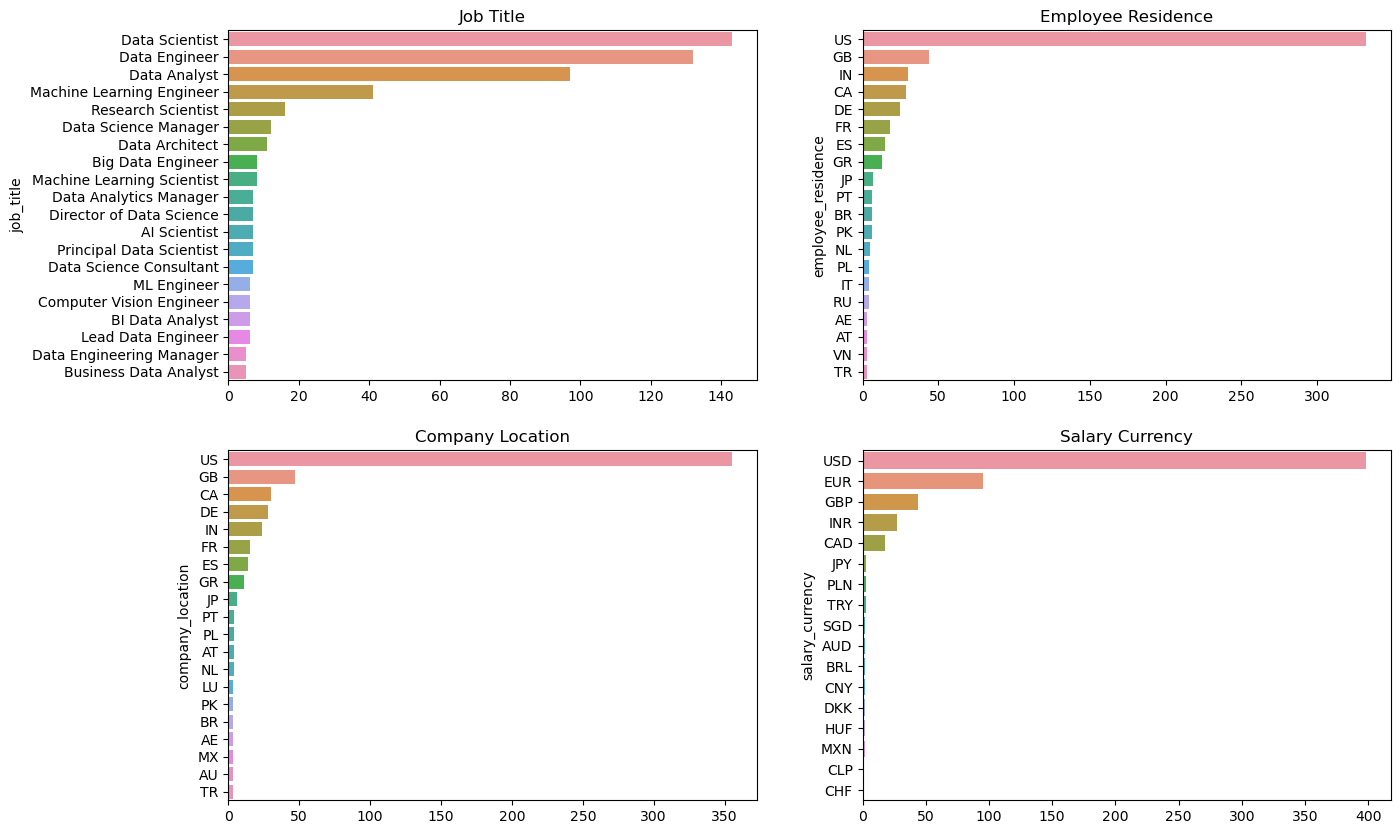

In [42]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), 
            y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), 
            y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), 
            y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), 
            y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");

Multivariate Analysis
Analysis 1: What is job with the highest salary in Data Science?

Text(0.5, 1.0, 'Highest Salary Jobs')

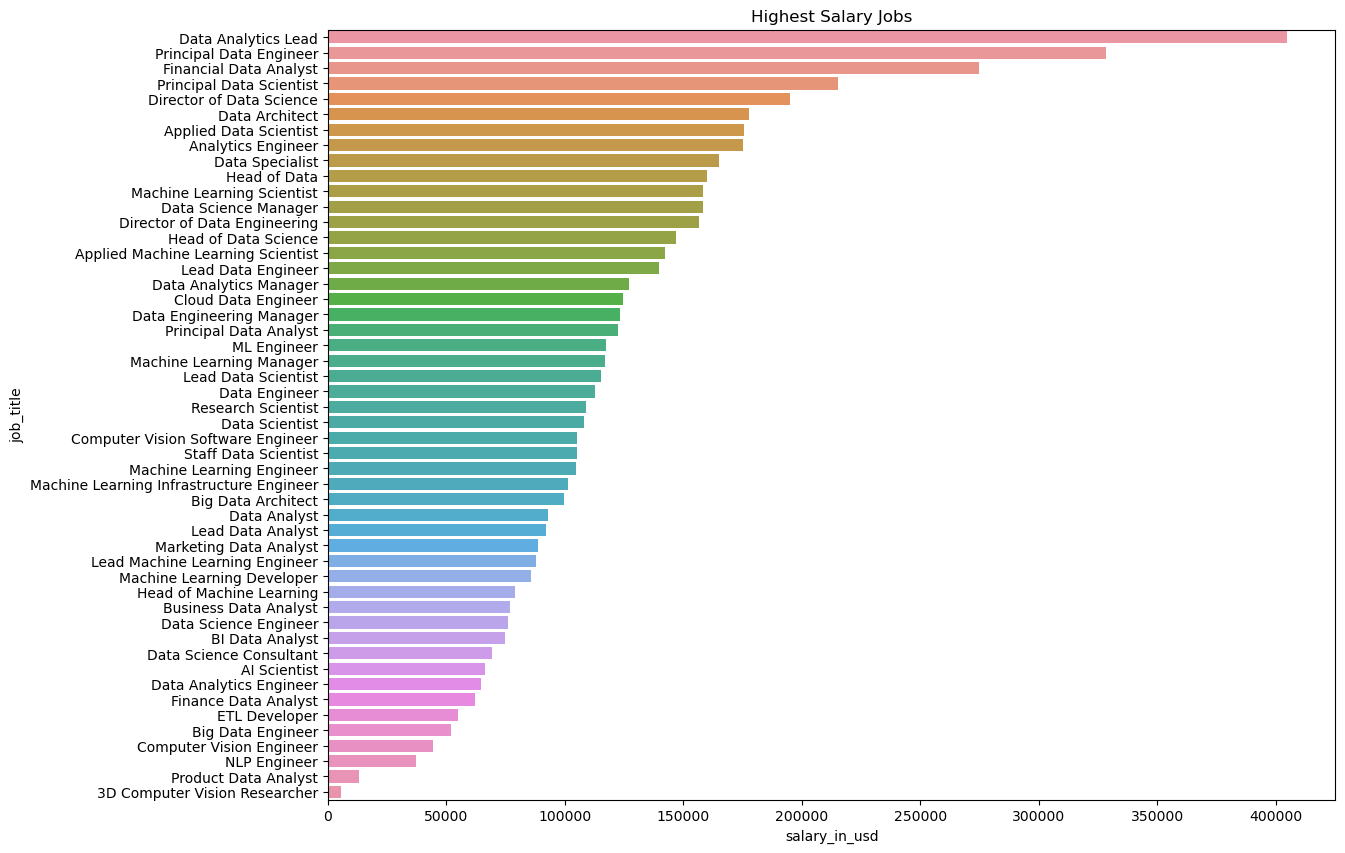

In [43]:

# Set the figure size
plt.figure(figsize = (13,10))

# plot a hist chart
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False), 
            y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).index)
plt.xlabel = ("Salary in USD")
# plt.xticks(rotation='vertical')
plt.title("Highest Salary Jobs")